In [2]:
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
import numpy as np

In [17]:
# 1.8mm space functional data
# subj01, session 1
beta_1pt8mm = nib.load("/home/jovyan/shared/NSD/nsddata_timeseries/ppdata/subj01/func1pt8mm/timeseries/timeseries_session21_run01.nii.gz")
beta_t1 = beta_1pt8mm.slicer[:,:,:,2].get_fdata()/300 # get trial 1

In [26]:
print("session 1 beta, data shape:",beta_t1.shape)
print(beta_t1.max())

session 1 beta, data shape: (81, 104, 83)
11.336666666666666


In [15]:
# 1.8mm space brain mask
brainmask_1pt8mm = nib.load("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/anat/T1_1pt0_masked.nii.gz")
brainmask = brainmask_1pt8mm.get_fdata()

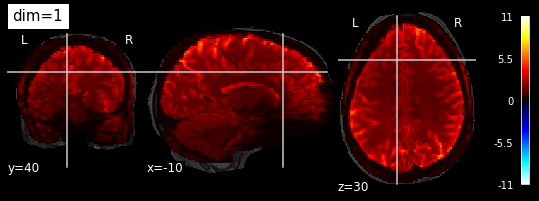

In [27]:
# overlay beta map with brain mask
plotting.plot_stat_map(nib.Nifti1Image(beta_t1, beta_1pt8mm.affine), # this function needs a 3D data file
                       bg_img=nib.Nifti1Image(brainmask, brainmask_1pt8mm.affine), # load the brain mask as a background picture
                       cut_coords=(-10, 40, 30), 
                       threshold=0, title="dim=1",
                       dim=1,vmax=11)

In [29]:
# 1.8mm MTL mask
MTL= nib.load("/home/jovyan/MTL.nii")
mask = MTL.get_fdata()

In [30]:
print("MTL mask shape:",mask.shape)
print("Unique numbers in the mask:",np.unique(mask))

MTL mask shape: (81, 104, 83)
Unique numbers in the mask: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [ ]:
# overlay MTL mask with brain mask
plotting.plot_stat_map(nib.Nifti1Image(mask, MTL.affine), # this argument needs a 3D data file
                       bg_img=nib.Nifti1Image(brainmask, brainmask_1pt8mm.affine), # the anatomical background
                       cut_coords=(-15, 0, -10), 
                       threshold=0, title="Subj01_MTL mask overlay T1",
                       dim=0.5,vmax=10)

In [10]:
mask_cor = np.where(mask==1)
print(mask_cor)

(array([26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34,
       48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 5

In [11]:
mask_r1 = beta_t1[mask_cor[0],mask_cor[1],mask_cor[2]]
print(len(mask_r1))
print(mask_r1)

345
[-4.39666667e+00 -1.87000000e+00 -1.10333333e+01  1.38333333e+00
  1.01666667e+01 -1.37333333e+00 -5.04333333e+00 -1.71000000e+00
  7.92666667e+00 -1.00000000e-01  9.33333333e-02 -1.43566667e+01
 -3.21333333e+00 -8.86666667e-01 -1.58333333e+00  8.63666667e+00
 -2.28000000e+00 -1.83333333e+00  3.16666667e+00  5.33333333e-02
  4.48666667e+00 -6.90333333e+00  4.40666667e+00 -1.39333333e+00
 -4.43666667e+00  2.84000000e+00 -7.05000000e+00 -4.11333333e+00
 -1.75900000e+01 -5.96666667e-01 -1.59833333e+01  5.00333333e+00
  1.54733333e+01  2.26666667e+00 -2.51000000e+00 -8.13333333e+00
 -7.20666667e+00  5.28666667e+00 -1.36666667e+00  4.13333333e+00
  3.92666667e+00  8.26666667e-01  3.95333333e+00  2.76333333e+00
  1.12666667e+00  3.75666667e+00 -6.53333333e-01  1.08000000e+00
  6.00000000e-01  3.33666667e+00  5.53333333e-01  2.40000000e-01
 -1.77000000e+00  2.12000000e+00  6.23666667e+00  1.06666667e+00
 -1.88333333e+00  3.13333333e-01  2.02000000e+00  1.59000000e+00
 -4.90666667e+00  5.4

In [33]:
np.mean(mask_r1)

-0.39875362318840585

In [34]:
mask_cor = np.where(mask==2)
mask_r2 = beta_t1[mask_cor[0],mask_cor[1],mask_cor[2]]

In [35]:
np.mean(mask_r2)

0.5534854771784232